<a href="https://colab.research.google.com/github/Rohit-Madhesiya/ML_Colab_Repos/blob/main/DL2_MNIST_Digit_Classification_using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Loading the MNIST data from keras.datasets**

In [59]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [60]:
type(X_train)

numpy.ndarray

In [61]:
# Shape of the numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data size=60,000Images \\
Test data size=10,000Images

---
Image dimension = 28 x 28 \\
Grayscale image = 1 Channel


In [62]:
# printing the 5th image from X_train
print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113
   87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 18

In [63]:
print(X_train[4].shape)

(28, 28)


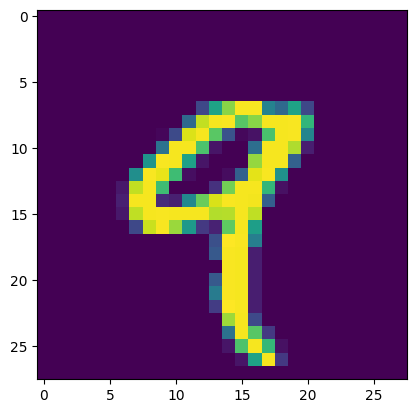

9


In [64]:
# displaying the 5th image
plt.imshow(X_train[4])
plt.show()

# printing the corresponding label
print(Y_train[4])

Image Labels

In [65]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [66]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


These labels can be used as such or can also by applied One Hot Encoding

All the images have the same dimensions in this dataset, if not we have to resize the images to a common dimension


In [67]:
# scaling the values
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [68]:
# printing the 5th images using scaled dataset
print(X_train_scaled[4])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building the Neural Network**

In [69]:
# Setting up the layers of the Neural Network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
# compiling the Neural Network model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
# training the NN model
model.fit(X_train_scaled,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8054 - loss: 0.5818
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9753 - loss: 0.0819
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9800 - loss: 0.0681
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9835 - loss: 0.0564
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9855 - loss: 0.0477
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9886 - loss: 0.0405
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9890 - loss: 0.0374
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9902 - loss: 0.0331
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9910 - loss: 0.0301
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9924 - loss: 0.0252


Training data accuracy= 95.52%

**Accuracy on Test Data:**

In [102]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(loss)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9454 - loss: 41.7081
34.275814056396484
0.9537000060081482


Test Data Accuracy=94.69%

In [103]:
print(X_test.shape)

(10000, 28, 28)


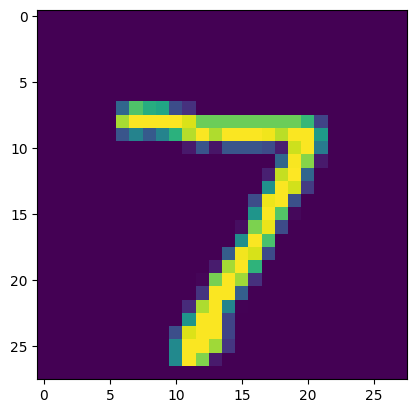

In [74]:
# Display the first data point in X_test
plt.imshow(X_test[0])

In [104]:
print(Y_test[0])

7


In [105]:
Y_predict=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [106]:
print(Y_predict.shape)

(10000, 10)


In [107]:
print(Y_predict[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


model.predict() gives the prediction probability of each class for that data point

In [108]:
# converting the prediction probability to class label
first_image_label=np.argmax(Y_predict[0])
print(first_image_label)

7


In [109]:
# converting the prediction probability to class label for all test data point
Y_predict_labels=[np.argmax(i) for i in Y_predict]
print(Y_predict_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 3, 9, 7, 3, 4, 9, 5, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 1, 1, 1, 7, 4, 1, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 5, 3, 3, 4, 6, 4, 3, 0, 0, 0, 2, 7, 1, 7, 3, 1, 9, 7, 7, 5, 2, 7, 8, 4, 7, 3, 6, 1, 3, 5, 4, 3, 1, 4, 1, 7, 5, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 6, 4, 4, 9, 2, 3, 4, 7, 6, 7, 9, 0, 5, 8, 5, 5, 5, 5, 3, 8, 1, 0, 1, 6, 4, 5, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 3, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 5, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 3, 1, 5, 4, 2, 3, 6, 1, 1, 1, 3, 5, 5, 2, 5, 4, 5, 9, 3, 9, 0, 3, 5, 5, 3, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 5, 3, 3, 9, 2, 2, 4, 1, 3, 3, 8, 7, 2, 3, 0, 6, 4, 1, 4, 1, 9, 5, 7, 3, 2, 8, 2, 0, 8, 5, 7, 7, 8, 1, 0, 1, 8, 0, 3, 0, 1, 7, 3, 4, 1, 8, 2, 1, 2, 9, 3, 5, 9, 2, 5, 4, 0, 5, 5, 2, 9, 2, 0, 4, 0, 0, 2, 3, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 5, 5, 2, 5, 7, 3, 5, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

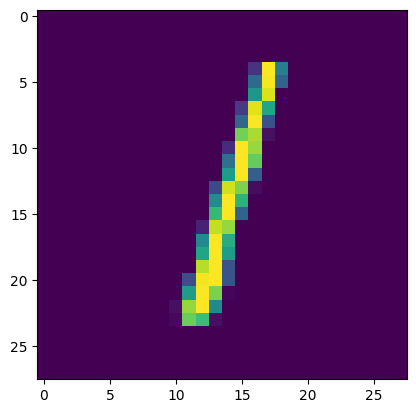

In [110]:
plt.imshow(X_test[2])

In [111]:
print(Y_predict_labels[2])

1


Y_test -> True labels \\
Y_predict_labels -> represents the Predicted Labels



---
**Building the Confusion Matrix**


In [112]:
confusion_mat=confusion_matrix(Y_test,Y_predict_labels)

In [113]:
print(confusion_mat)

tf.Tensor(
[[ 975    1    0    1    0    0    1    0    1    1]
 [  16 1109    1    4    0    1    3    0    1    0]
 [  22  108  890    6    0    0    2    2    2    0]
 [   2    2    8  995    0    3    0    0    0    0]
 [  20   11   12    0  908    0   10    5    0   16]
 [  11    1    1  189    1  688    0    0    1    0]
 [  44    3    2    0    2  286  621    0    0    0]
 [  20    2   20   68    0    1    0  914    0    3]
 [  74    4   11   63    2   82   18    5  704   11]
 [  17    3    2   50   19   45    1   45    4  823]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

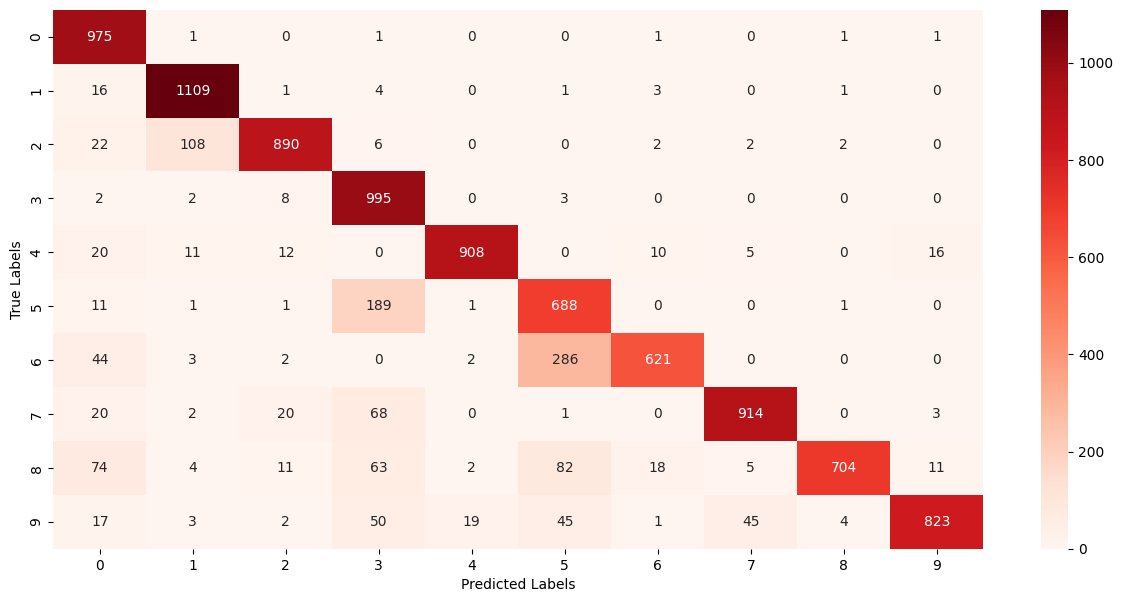

In [114]:
plt.figure(figsize=(15,7))
sns.heatmap(confusion_mat,annot=True,fmt='d',cmap='Reds')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

**Building a Predictive System**

In [115]:
input_img_path='/content/MNIST_digit.png'
input_img=cv2.imread(input_img_path)

In [116]:
type(input_img)

numpy.ndarray

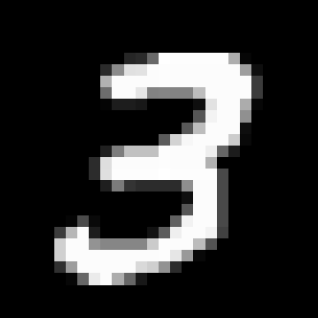

In [117]:
cv2_imshow(input_img)

In [118]:
input_img.shape

(318, 318, 3)

In [119]:
grayscale_img=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)


In [120]:
grayscale_img.shape

(318, 318)

In [121]:
resized_grayscale_img=cv2.resize(grayscale_img,(28,28))

In [122]:
resized_grayscale_img.shape

(28, 28)

In [123]:
cv2_imshow(resized_grayscale_img)

In [124]:
resized_grayscale_img=resized_grayscale_img/255


In [125]:
reshaped_img=np.reshape(resized_grayscale_img,[1,28,28])

In [126]:
input_predict=model.predict(reshaped_img)
print(input_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1.1519069e-14 2.3240932e-06 4.2537399e-10 1.0000000e+00 3.0834011e-16
  2.2570302e-03 1.0733451e-18 2.8176654e-09 1.9450894e-05 5.8948990e-05]]


In [127]:
input_predict_label=np.argmax(input_predict)
print(input_predict_label)

3


**Predictive System**

Path of the image to be predicted:/content/MNIST_digit.png


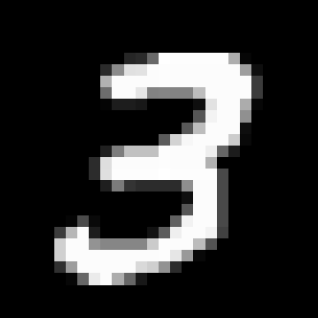

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The Digit is recognised as  3


In [128]:
input_img_path=input('Path of the image to be predicted:')
input_img=cv2.imread(input_img_path)

cv2_imshow(input_img)

grayscale_img=cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)

resized_grayscale_img=cv2.resize(grayscale_img,(28,28))

resized_grayscale_img=resized_grayscale_img/255

reshaped_img=np.reshape(resized_grayscale_img,[1,28,28])

input_predict=model.predict(reshaped_img)

input_predict_label=np.argmax(input_predict)

print('The Digit is recognised as ',input_predict_label)